## 타이타닉 데이터셋 시각화

* survived: 생존 여부를 나타내며, 0은 사망, 1은 생존을 의미합니다.
* pclass: 티켓 클래스를 나타내며, 1은 1등석, 2는 2등석, 3은 3등석을 의미합니다.
* sex: 승객의 성별을 나타냅니다.
* age: 승객의 나이입니다. 일부는 추정치일 수 있습니다.
* sibsp: 함께 탑승한 형제자매 또는 배우자의 수입니다.
* parch: 함께 탑승한 부모 또는 자녀의 수입니다.
* fare: 티켓 요금입니다.
* embarked: 승선한 항구를 나타냅니다. C는 셰르부르, Q는 퀸즈타운, S는 사우샘프턴입니다.
* class: 티켓의 클래스를 카테고리 형식으로 나타냅니다. pclass와 동일한 정보를 카테고리 형태로 제공합니다.
* who: 승객을 'man', 'woman', 'child'로 분류한 데이터입니다.
* adult_male: 성인 남성인지 여부를 나타내는 불리언 값입니다.
* deck: 객실이 위치한 데크(갑판)를 나타내며, 일부 확장된 데이터셋에만 포함된 정보입니다.
* embark_town: 승선한 항구의 이름입니다. embarked 컬럼의 정보를 문자열로 제공합니다.
* alive: 생존 여부를 'yes', 'no'로 나타낸 데이터입니다. survived 컬럼과 동일한 정보를 문자열로 제공합니다.
* alone: 승객이 혼자 탑승했는지 여부를 나타내는 불리언 값입니다. sibsp와 parch의 합이 0이면 True, 그렇지 않으면 False입니다.

In [2]:
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib
import numpy as np
import pandas as pd

In [178]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


#### 1. 승객의 생존 여부별로 각각의 수를 막대 그래프로 나타내세요.

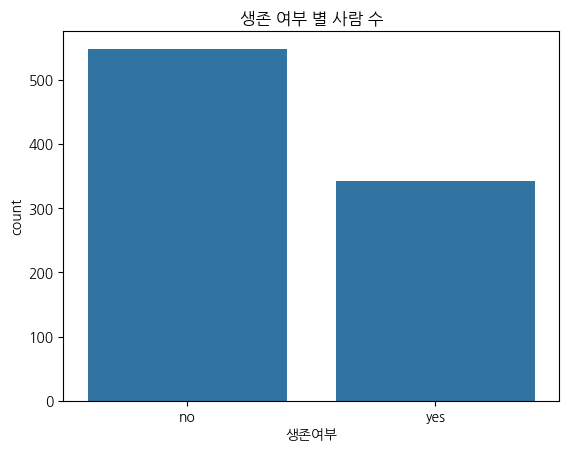

In [300]:
sns.countplot(data=df_titanic, x='alive')
plt.title('생존 여부 별 사람 수')
plt.xlabel('생존여부')
plt.show()

#### 2. 승객들의 연령 분포를 히스토그램으로 표시하세요

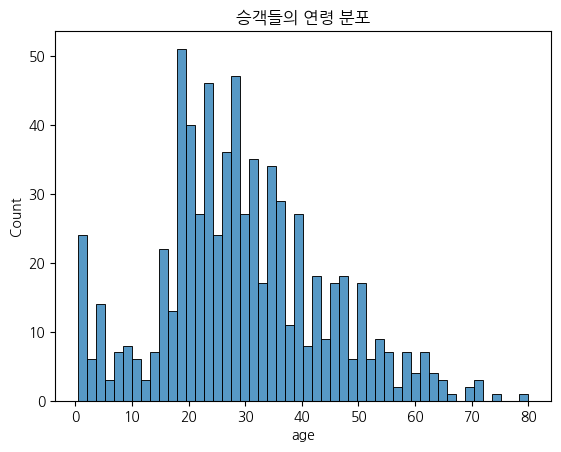

In [299]:
sns.histplot(data=df_titanic['age'], bins=50)
plt.title('승객들의 연령 분포')
plt.show()

#### 3. 연령대 별 생존자 수의 변화를 선 그래프로 나타내세요.

In [296]:
# 연령대 별 생존자 수 계산
df = df_titanic.groupby('age').agg({'survived':'sum'})

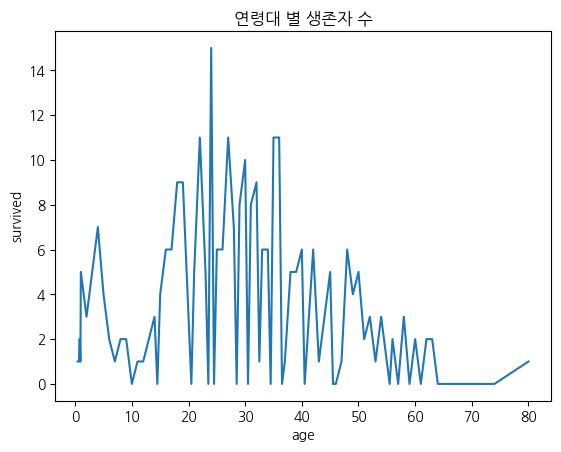

In [298]:
# 시각화
sns.lineplot(data=df, x = 'age', y = 'survived')

plt.title('연령대 별 생존자 수')
plt.show()

#### 4. 승객의 연령과 요금을 축으로 하는 스캐터 플롯을 그리고, 생존 여부에 따라 색상을 달리하세요.

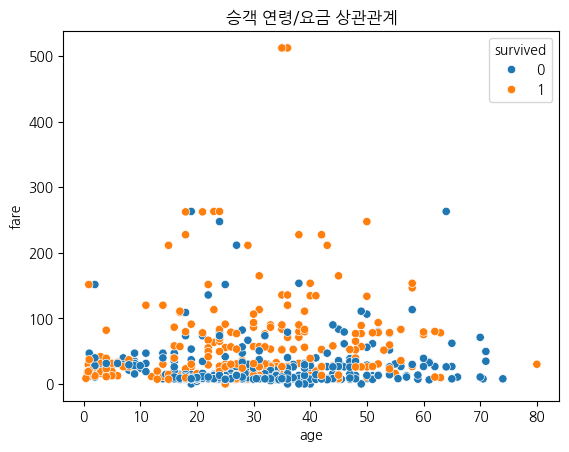

In [18]:
sns.scatterplot(data=df_titanic, x ='age', y = 'fare', hue='survived')
plt.title('승객 연령/요금 상관관계')
plt.show()

#### 5. 각 클래스별 승객의 연령 분포를 박스 플롯으로 나타내세요.

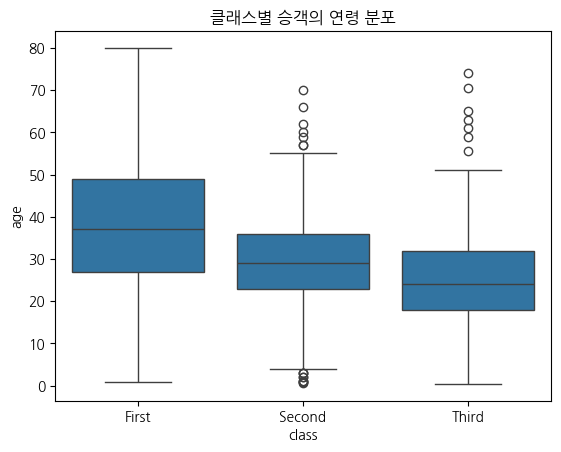

In [21]:
sns.boxplot(data=df_titanic, x='class', y ='age')
plt.title('클래스별 승객의 연령 분포')
plt.show()

#### 6. 각 클래스별 승객 수를 도넛 차트로 시각화하세요.

In [31]:
tmp = df_titanic['class'].value_counts()
tmp

class
Third     491
First     216
Second    184
Name: count, dtype: int64

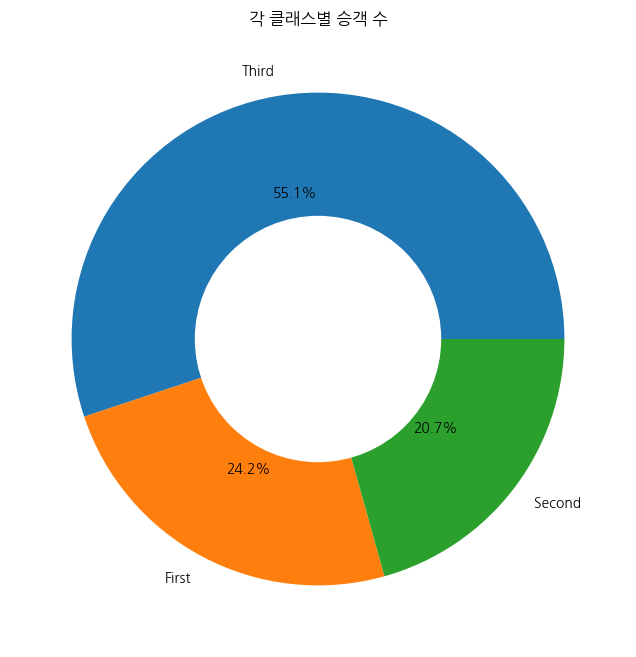

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(tmp, labels=tmp.index, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('각 클래스별 승객 수')
plt.show()

#### 7. 각 클래스에서의 생존자와 사망자 수를 스택드 바 차트로 나타내세요.

In [309]:
df = df_titanic.groupby(['class', 'survived'],observed=True).size().unstack(fill_value=0)
df

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


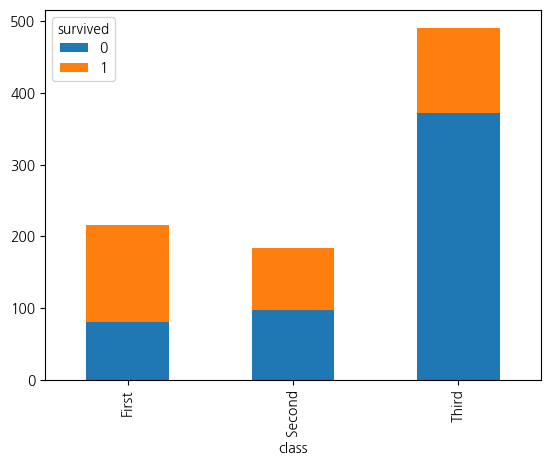

In [310]:
df.plot(kind='bar', stacked=True)
plt.show()

#### 8. 연령대, 요금, 생존 여부를 이용하여 버블 차트를 만드세요. 각 버블의 크기는 승객 수에 따라 다르게 하세요.

In [289]:
# 연령을 10세 단위로 구분하여 새로운 열 추가
df_titanic['age_range'] = (df_titanic['age'] // 10) * 10
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_range
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.0


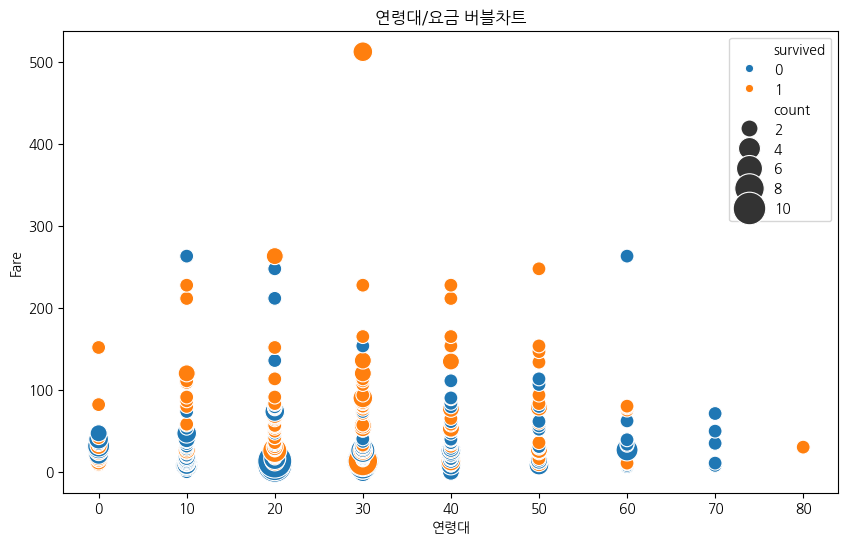

In [294]:
# 각 연령대와 생존 여부에 따른 승객 수 집계
bubble_data = df_titanic.groupby(['age_range', 'fare', 'survived']).size().reset_index(name='count')

# 버블 차트 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bubble_data,x='age_range', y='fare',  size='count', hue='survived', sizes=(100, 600))
plt.title('연령대/요금 버블차트')
plt.xlabel('연령대')
plt.ylabel('Fare')


# 그래프 표시
plt.show()

#### 9. 탑승항구별 승객 분포를 파이차트로 나타내세요.

In [144]:
df4 = df_titanic.groupby('embark_town',observed=True).size()
df4

embark_town
Cherbourg      168
Queenstown      77
Southampton    644
dtype: int64

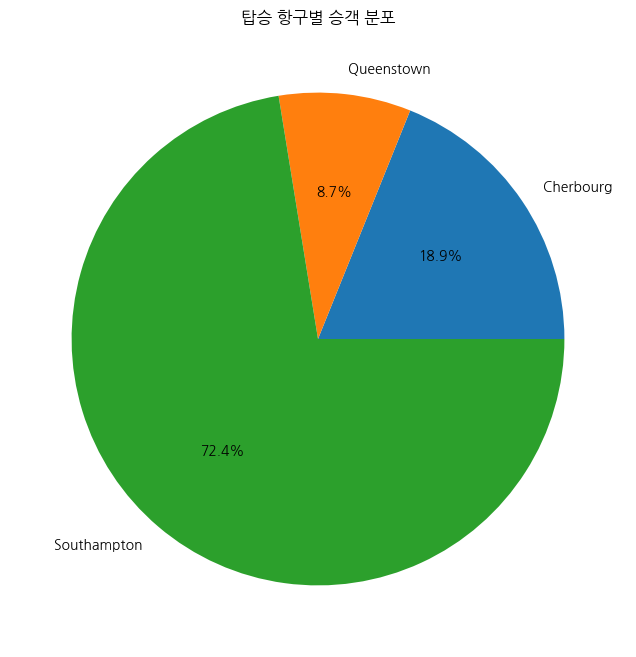

In [146]:
# 시각화
plt.figure(figsize=(8, 8))
plt.pie(df4, labels=df4.index, autopct='%1.1f%%')

plt.title('탑승 항구별 승객 분포')
plt.show()

#### 10. 클래스별, 성별 생존률을 히트맵으로 시각화 하세요.

In [180]:
# 클래스별 인원
g = df_titanic.groupby('class',observed='True').size()

# 클래스별 생존자 수 집계
g2 = df_titanic.groupby('class', observed=True).agg({'survived': 'sum'})
g2 = pd.Series(g2['survived'])

In [177]:
# 클래스 별 생존률 계산
survival_rate = (g2 / g) * 100
survival_rate

class
First     62.962963
Second    47.282609
Third     24.236253
dtype: float64

In [184]:
# 시리즈를 데이터프레임으로
survival_df = pd.DataFrame(survival_rate)
survival_df.rename(columns={0: 'survival_rate'}, inplace=True)

In [185]:
survival_df

,survival_rate
class,
First,62.962963
Second,47.282609
Third,24.236253


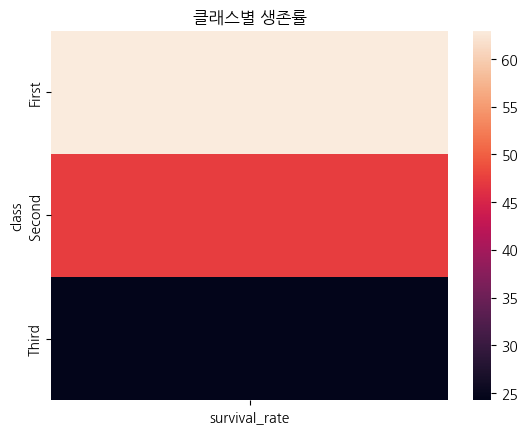

In [187]:
# 시각화
sns.heatmap(data=survival_df)
plt.title('클래스별 생존률')
plt.show()

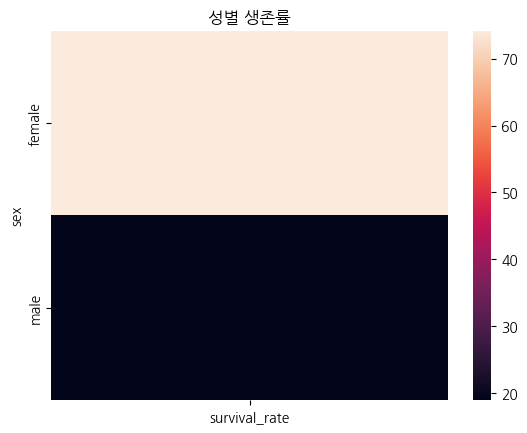

In [190]:
# 성별간 인구 집계
g3 = df_titanic.groupby('sex',observed='True').size()
# 성별간 생존자 수 계산
g4 = df_titanic.groupby('sex', observed=True).agg({'survived': 'sum'})
g4 = pd.Series(g4['survived'])

# 성별 생존률 계산
survival_rate_sex = (g4 / g3) * 100
survival_sex_df = pd.DataFrame(survival_rate_sex)
survival_sex_df.rename(columns={0: 'survival_rate'}, inplace=True)

# 시각화
sns.heatmap(data=survival_sex_df)
plt.title('성별 생존률')
plt.show()

#### 11. 연령, 클래스, 요금, 생존 여부를 포함하여 다변량 데이터 관계를 페어플롯으로 나타내세요.

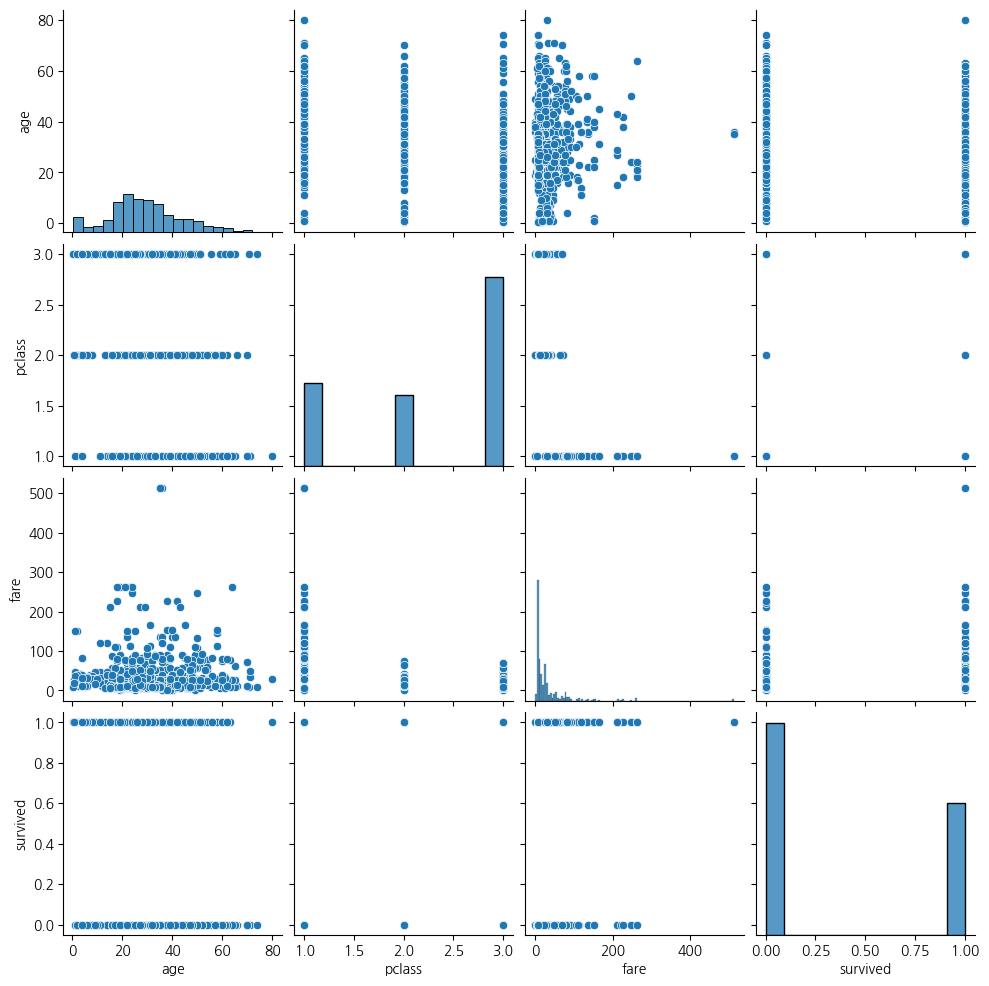

In [205]:
sns.pairplot(data=df_titanic[['age','pclass','fare','survived']])
plt.show()

#### 12. 클래스와 성별에 따른 요금 분포를 바이올린 플롯으로 시각화하세요

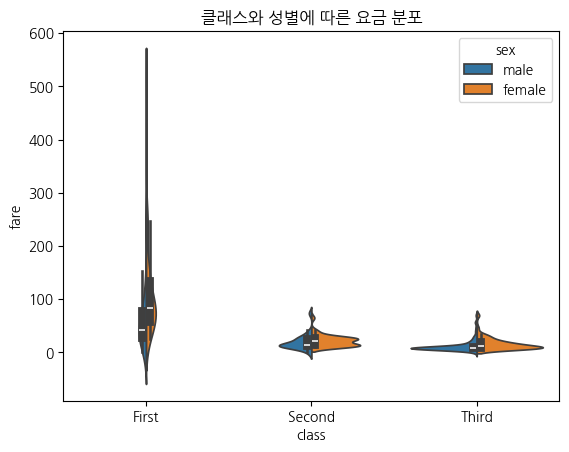

In [202]:
sns.violinplot(data=df_titanic, x='class', y='fare', hue='sex', split=True)

plt.title('클래스와 성별에 따른 요금 분포')
plt.show()

#### 13. 연령대별 평균 요금 변화를 라인 플롯으로 나타내세요.

In [219]:
# 연령, 요금, 생존 여부에 따라 집계
new_df = df_titanic.groupby(['age','fare'], observed=True).size().reset_index(name='counts')

# 연령을 10세 단위로 구분하여 새로운 열 추가
new_df['age_range'] = (new_df['age'] // 10) * 10

In [221]:
# 연령대별 평균 요금
avg_fare_by_age_range = new_df.groupby('age_range', observed=True).agg({'fare':'mean'})

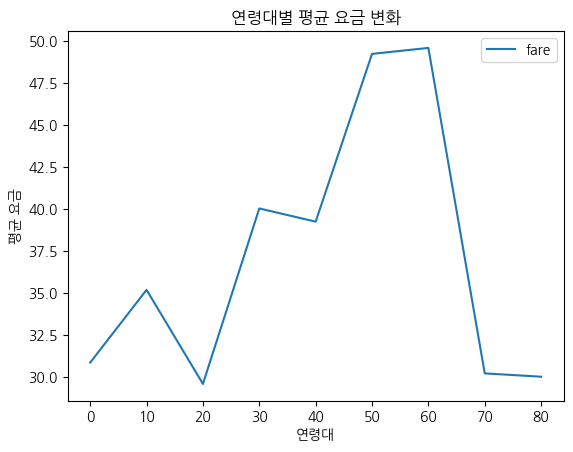

In [226]:
sns.lineplot(data=avg_fare_by_age_range)
plt.title('연령대별 평균 요금 변화')
plt.xlabel('연령대')
plt.ylabel('평균 요금')
plt.show()

#### 14. 서브플롯 활용한 연령대 및 성별 생존율 비교:
- 가. 각 클래스 별로 서브플롯을 생성하세요. 각 서브플롯 안에서 남성과 여성 승객의 연령대별 (예:0-10, 11-20, 21-30 등) 생존율을 바 차트로 비교하세요.

- 나. 이 문제에서는 각 클래스(1등석,2등석,3등석)를 나타내는 세 개의 서브플롯을 만들고, 각 서브플롯 내에서는 성별에 따른 연령대별 생존율을 막대 그래프로 표시합니다. 성별을 색상으로 구분하여 표시하세요.

In [303]:
# 인구집계
tmp14 = df_titanic.groupby(['class','sex','age_range'],observed=True).size()
tmp14.info()

<class 'pandas.core.series.Series'>
MultiIndex: 44 entries, ('First', 'female', 0.0) to ('Third', 'male', 70.0)
Series name: None
Non-Null Count  Dtype
--------------  -----
44 non-null     int64
dtypes: int64(1)
memory usage: 847.0+ bytes


In [304]:
# 각 클래스별, 성별, 연령대별 생존자
tmp15 = df_titanic.groupby(['class','sex','age_range'],observed=True).agg({'survived': 'sum'})
tmp15 = pd.Series(tmp15['survived'])
tmp15

class   sex     age_range
First   female  0.0           0
                10.0         13
                20.0         15
                30.0         27
                40.0         13
                50.0         11
                60.0          3
        male    0.0           2
                10.0          2
                20.0          9
                30.0         12
                40.0          9
                50.0          4
                60.0          1
                70.0          0
                80.0          1
Second  female  0.0           8
                10.0          8
                20.0         22
                30.0         16
                40.0          9
                50.0          5
        male    0.0           9
                10.0          1
                20.0          0
                30.0          3
                40.0          1
                50.0          0
                60.0          1
                70.0          0
Third   female

In [238]:
tmp15.info()

<class 'pandas.core.series.Series'>
MultiIndex: 44 entries, ('First', 'female', 0.0) to ('Third', 'male', 70.0)
Series name: survived
Non-Null Count  Dtype
--------------  -----
44 non-null     int64
dtypes: int64(1)
memory usage: 847.0+ bytes


In [305]:
# 생존률 계산
survival_rate = (tmp15 / tmp14) * 100
survival_rate

class   sex     age_range
First   female  0.0            0.000000
                10.0         100.000000
                20.0          93.750000
                30.0         100.000000
                40.0         100.000000
                50.0          91.666667
                60.0         100.000000
        male    0.0          100.000000
                10.0          40.000000
                20.0          50.000000
                30.0          52.173913
                40.0          37.500000
                50.0          26.666667
                60.0          10.000000
                70.0           0.000000
                80.0         100.000000
Second  female  0.0          100.000000
                10.0         100.000000
                20.0          88.000000
                30.0          94.117647
                40.0          90.000000
                50.0          83.333333
        male    0.0          100.000000
                10.0          10.000000
              

In [246]:
# dataFrame 변환후 columns 재작명

survival_rate_df = pd.DataFrame(survival_rate)
survival_rate_df.rename(columns={0: 'survival_rate'}, inplace=True)
survival_rate_df

survival_rate
class  sex    age_range               
First  female 0.0             0.000000
              10.0          100.000000
              20.0           93.750000
              30.0          100.000000
              40.0          100.000000
              50.0           91.666667
              60.0          100.000000
       male   0.0           100.000000
              10.0           40.000000
              20.0           50.000000
              30.0           52.173913
              40.0           37.500000
              50.0           26.666667
              60.0           10.000000
              70.0            0.000000
              80.0          100.000000
Second female 0.0           100.000000
              10.0          100.000000
              20.0           88.000000
              30.0           94.117647
              40.0           90.000000
              50.0           83.333333
       male   0.0           100.000000
              10.0           10.000000
              20.0            0.000000
              30.0            9.677419
              40.0           12.500000
              50.0            0.000000
              60.0           33.333333
              70.0            0.000000
Third  female 0.0            52.380952
              10.0           54.166667
              20.0           48.387097
              30.0           43.750000
              40.0            0.000000
              60.0          100.000000
       male   0.0            38.095238
              10.0            9.523810
              20.0           15.686275
              30.0           15.094340
              40.0            8.000000
              50.0            0.000000
              60.0            0.000000
              70.0            0.000000

In [271]:
survival_rate_df = survival_rate_df.reset_index()

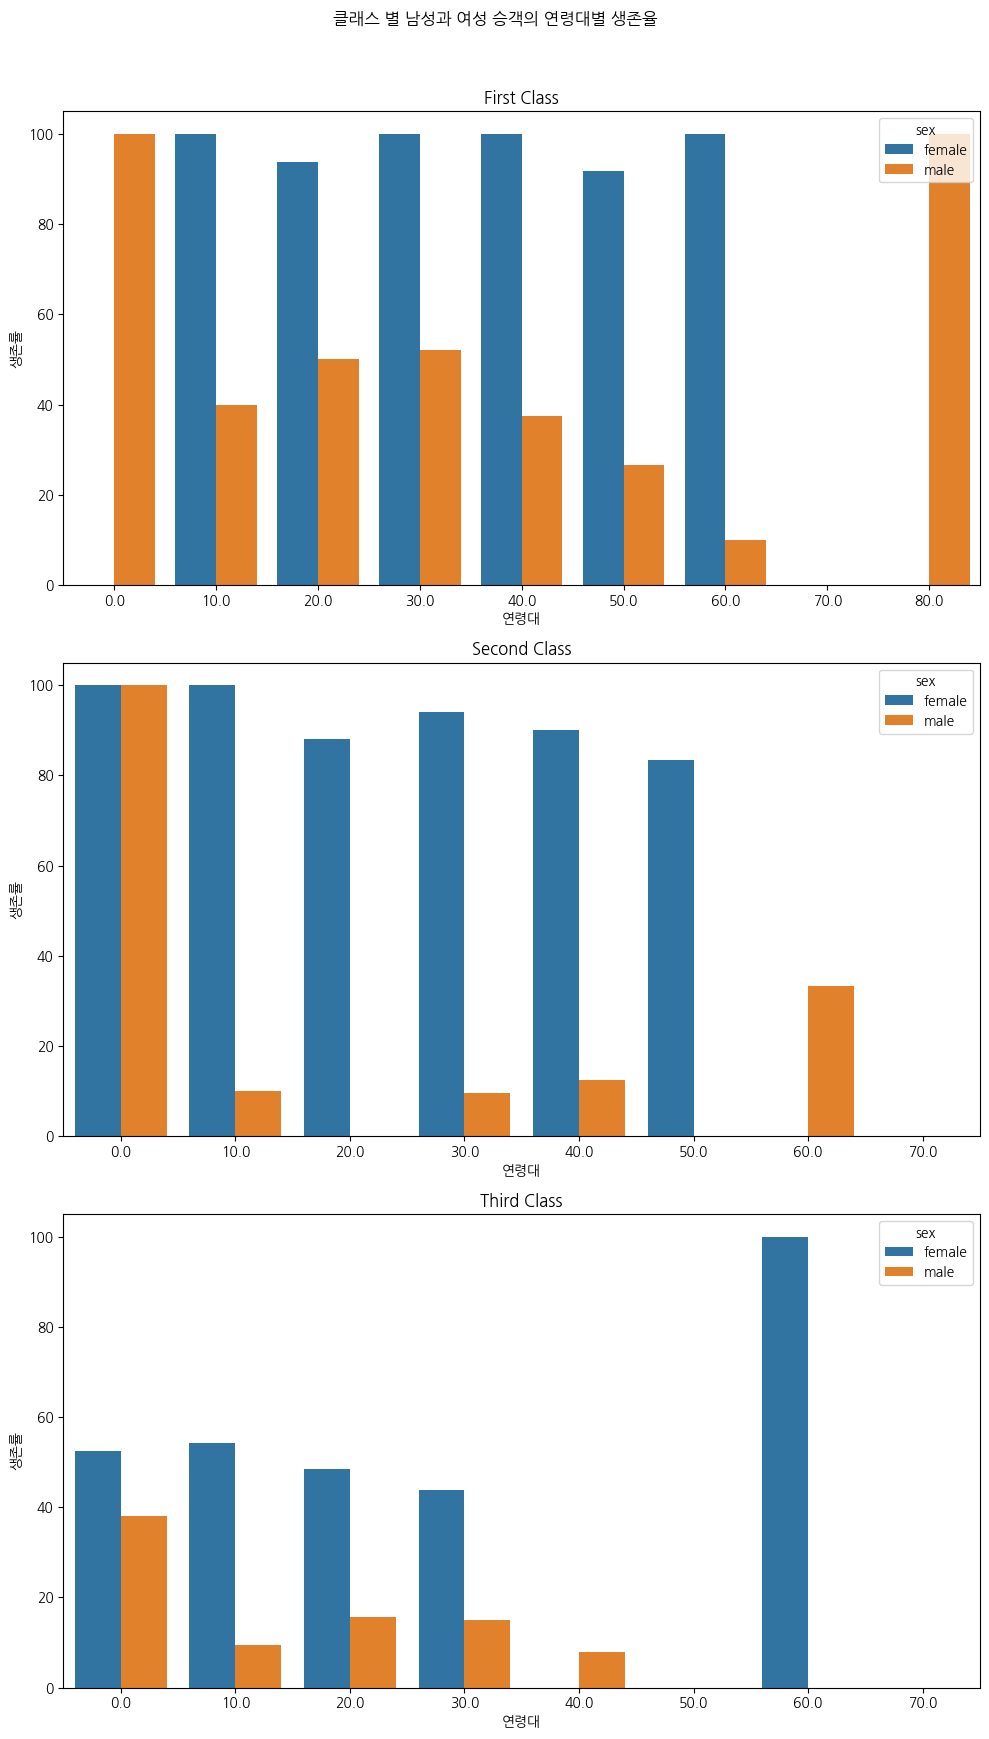

In [302]:
fig, axes = plt.subplots(3,1, figsize=(10, 17))

plt.suptitle('클래스 별 남성과 여성 승객의 연령대별 생존율', y=1.02)

# First Class
sns.barplot(data=survival_rate_df[survival_rate_df['class'] == 'First'], x='age_range', y='survival_rate', hue='sex', ax=axes[0])
axes[0].set_title('First Class')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('생존률')

# Second Class
sns.barplot(data=survival_rate_df[survival_rate_df['class'] == 'Second'], x='age_range', y='survival_rate', hue='sex', ax=axes[1])
axes[1].set_title('Second Class')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('생존률')
# Third Class
sns.barplot(data=survival_rate_df[survival_rate_df['class'] == 'Third'], x='age_range', y='survival_rate', hue='sex', ax=axes[2])
axes[2].set_title('Third Class')
axes[2].set_xlabel('연령대')
axes[2].set_ylabel('생존률')
plt.tight_layout()
plt.show()